# 1) Importing libraries necessary to clean and process the data. 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# allow pandas to display all columns and rows as we have a large data set
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [124]:
# bring in initial dataset as a DataFrame
ames = pd.read_csv('./datasets/train.csv')
ames_test = pd.read_csv('./datasets/test.csv')

# 2) EDA

There is a lot of data to clean here. We start with 81 individual columns, impute the nulls, and adjust the titles to be workable. 

In [125]:
# list comprehension to loop through column names making them lower case and replacing spaces with underscores

ames.columns = [i.replace(' ','_').lower() for i in ames.columns]

In [126]:
# find Null Values in data set.
ames.isna().sum().sort_values(ascending=False).head(27)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
total_bsmt_sf        1
bsmtfin_sf_1         1
overall_cond         0
dtype: int64

### IMPUTE Values for columns with NaN values in the following 3 cells

In [127]:
# Imputing values for NaN values in these columns. The value is 0 for numerical columns, and unkwn for strings.

# These columns are numerical measures and the nulls are for houses without these features so we will set them at 0
ames['bsmtfin_sf_1'].fillna(value=0,inplace=True)
ames['total_bsmt_sf'].fillna(value=0,inplace=True)
ames['total_bsmt_sf'].fillna(value=0,inplace=True)
ames['bsmtfin_sf_2'].fillna(value=0,inplace=True)
ames['bsmt_unf_sf'].fillna(value=0,inplace=True)
ames['garage_area'].fillna(value=0,inplace=True)
ames['garage_cars'].fillna(value=0,inplace=True)
ames['bsmt_full_bath'].fillna(value=0,inplace=True)
ames['bsmt_half_bath'].fillna(value=0,inplace=True)


# this is the width of the property as it faces the street, which all houses must do. We will impute based on the mean.
ames['lot_frontage'].fillna(value=ames['lot_frontage'].mean(),inplace=True)

# These features are strings, so for now we will fill the NaN values with 'unknown' displayed as 'unkwn'
ames['fence'].fillna(value='unkwn',inplace=True)
ames['fireplace_qu'].fillna(value='unkwn',inplace=True)
ames['misc_feature'].fillna(value='unkwn',inplace=True)
ames['mas_vnr_type'].fillna(value='unkwn',inplace=True)
ames['mas_vnr_area'].fillna(value='unkwn',inplace=True)
ames['garage_qual'].fillna(value='unkwn',inplace=True)
ames['garage_finish'].fillna(value='unkwn',inplace=True)
ames['garage_cond'].fillna(value='unkwn',inplace=True)
ames['garage_type'].fillna(value='unkwn',inplace=True)
ames['bsmt_exposure'].fillna(value='unkwn',inplace=True)
ames['bsmtfin_type_2'].fillna(value='unkwn',inplace=True)
ames['bsmtfin_type_1'].fillna(value='unkwn',inplace=True)
ames['bsmt_cond'].fillna(value='unkwn',inplace=True)
ames['bsmt_qual'].fillna(value='unkwn',inplace=True)

# garage year is tricky as the houses without a garage don't have a year built for the garage. I will impute year here that the house was built, and in 'garage_type' we will see if there is a garage or not
ames['garage_yr_blt'] = np.where(ames['garage_yr_blt'] == np.nan,ames['year_built'],1950)

### These following two cells were used for EDA, however, running them now doesn't return anything of worth. 

### Essentially, I ran every column that had NaN values and then appended it to the cell above with the appropriate imputation.

In [128]:
# checking for nulls. quite a few, so we'll have to go through a potentially drop some columns, rows and/or impute
ames.isna().sum().sort_values(ascending = False).head(3)

pool_qc      2042
alley        1911
saleprice       0
dtype: int64

In [129]:
# I'm using this value_counts cell to look at each column with nulls to figure out if it should be dropped or imputed
ames['lot_frontage'].value_counts().head()

69.0552    330
60.0000    179
70.0000     96
80.0000     94
50.0000     90
Name: lot_frontage, dtype: int64

In [130]:
ames['lot_frontage'].describe()

count    2051.000000
mean       69.055200
std        21.306357
min        21.000000
25%        60.000000
50%        69.055200
75%        78.000000
max       313.000000
Name: lot_frontage, dtype: float64

## Drop columns that don't have a lot of Data and don't appear at all relevant to modeling

### **DO NOT RUN THESE 2 CELLS. ONLY HERE LEFT OVER. THIS CODE IS NOT IN FUNCTION TO FOLLOW!!!!**

In [131]:
# Less than 1% of houses have this data filled in
# ames.drop(columns=['pool_qc','alley'], inplace=True)

In [132]:
# all of the houses have the same value for utilities
# ames.drop(columns=['utilities'], inplace=True)

# 3) Feature Engineering

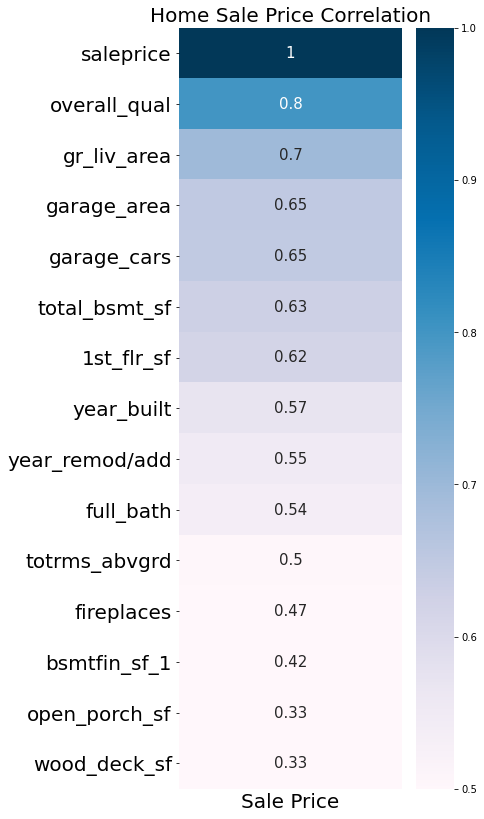

In [133]:
# run a correlation heatmap against saleprice to find important variables
plt.figure(figsize=(5,14))
sns.heatmap(ames.corr()[['saleprice']].sort_values('saleprice',ascending=False).head(15),
           annot=True,
            cmap='PuBu',
            annot_kws={'fontsize':15},
            vmin=.5,
            vmax=1
           )
plt.title('Home Sale Price Correlation',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(ticks=[])
plt.xlabel('Sale Price',fontsize=20);

In [134]:
# there are 3 lists here which are groups of features that can be considered, broken up by type of feature
# keeping these lists here for reference
sq_ft = ['gr_liv_area','lot_area','lot_frontage','bsmtfin_sf_1','bsmt_unf_sf','bsmtfin_sf_2'
         ,'total_bsmt_sf','1st_flr_sf','2nd_flr_sf','garage_area','enclosed_porch'] # gave me ~ 43K
rooms = ['full_bath','half_bath','bedroom_abvgr','kitchen_abvgr','totrms_abvgrd']
qual_cond = ['overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual','bsmt_cond','kitchen_qual']
years = ['year_remod/add','year_built']
misc_num = []
misc_cat = ['ms_subclass','ms_zoning','pave','lot_shape','land_contour','lot_config','neighborhood','bldg_type']
exterior = ['exterior_1st','exterior_2nd']


In [140]:
# write a function to do the feature column adding so I can add it to the test data csv along with the train.csv
def new_col(data):
    
    # Less than 1% of houses have this data filled in
    if 'pool_qc' in data:
        data.drop(columns=['pool_qc'], inplace=True)
    if 'alley' in data:
        data.drop(columns=['alley'], inplace=True)
    # all of the houses have the same value for utilities
    if 'utilities' in data:
        data.drop(columns=['utilities'], inplace=True)
    
    # ensure the columns are lower string and there are no spaces
    data.columns = [i.replace(' ','_').lower() for i in data.columns]
    
    # use get dummies to parse out various lot shape categorical information
    data = pd.get_dummies(data, columns=['lot_shape'],prefix='shape', drop_first=True)    
    
    # There is high correlation on bathrooms, so let's make a columns with the total bathroom count
    # half bathrooms need to be counted as integers as they are a Whole room even though they don't have a shower or bath.
    data['tot_baths'] = data['full_bath'] + data['half_bath'].astype(int) + data['bsmt_full_bath']+ data['bsmt_half_bath'].astype(int)
    
    # calculate the total livable square footage 1st & 2nd floor, basements, garage
    data['tot_sq_ft'] = data['bsmtfin_sf_1'] + data['bsmtfin_sf_2'] + data['bsmt_unf_sf'] + data['1st_flr_sf'] + data['2nd_flr_sf'] + data['garage_area']
    
    # apply get_dummies to categorical column sale_type to parse out normal and new sales from irregular sales
    data = pd.concat([data, pd.get_dummies(data['sale_type'],prefix='sale')],axis=1)

    # create log of sqft as there could be a use for this (didn't end up using this)
    data['log_sqft'] = np.log(data['tot_sq_ft'])

    
    # calculate the quality of the square footage, idea from Patrick Wales Dinan
    data['sqft_qual'] = data['overall_qual'] * data['tot_sq_ft']

    # create columns for edwards neighborhood, the neighborhood of the outliers
    # data['edwards'] = np.where(data['neighborhood'] == 'Edwards',1,0)
    data = pd.get_dummies(data, columns=['neighborhood'], drop_first=True)  
    
    #triple check make sure all columns are lower case without spaces
    data.columns = [i.replace(' ','_').lower() for i in data.columns]

    
    return data

In [141]:
ames_train = new_col(ames)
ames_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,land_contour,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,shape_ir2,shape_ir3,shape_reg,tot_baths,tot_sq_ft,sale_cod,sale_cwd,sale_con,sale_conld,sale_conli,sale_conlw,sale_new,sale_oth,sale_wd_,log_sqft,sqft_qual,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker
0,109,533352170,60,RL,69.0552,13517,Pave,Lvl,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,unkwn,Attchd,1950,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,unkwn,unkwn,0,3,2010,WD,130500,0,0,0,3.0,2679.0,0,0,0,0,0,0,0,0,1,7.893199,16074.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0000,11492,Pave,Lvl,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1950,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,unkwn,unkwn,0,4,2009,WD,220000,0,0,0,4.0,3594.0,0,0,0,0,0,0,0,0,1,8.187021,25158.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0000,7922,Pave,Lvl,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,unkwn,Detchd,1950,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,unkwn,unkwn,0,1,2010,WD,109000,0,0,1,2.0,2360.0,0,0,0,0,0,0,0,0,1,7.766417,11800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0000,9802,Pave,Lvl,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,unkwn,BuiltIn,1950,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,unkwn,unkwn,0,4,2010,WD,174000,0,0,1,3.0,2228.0,0,0,0,0,0,0,0,0,1,7.708860,11140.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0000,14235,Pave,Lvl,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,unkwn,Detchd,1950,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,unkwn,unkwn,0,3,2010,WD,138500,0,0,0,2.0,2605.0,0,0,0,0,0,0,0,0,1,7.865188,15630.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [142]:
ames_test = new_col(ames_test)

In [143]:
ames_train.shape

(2051, 119)

In [144]:
ames_test.shape

(878, 120)

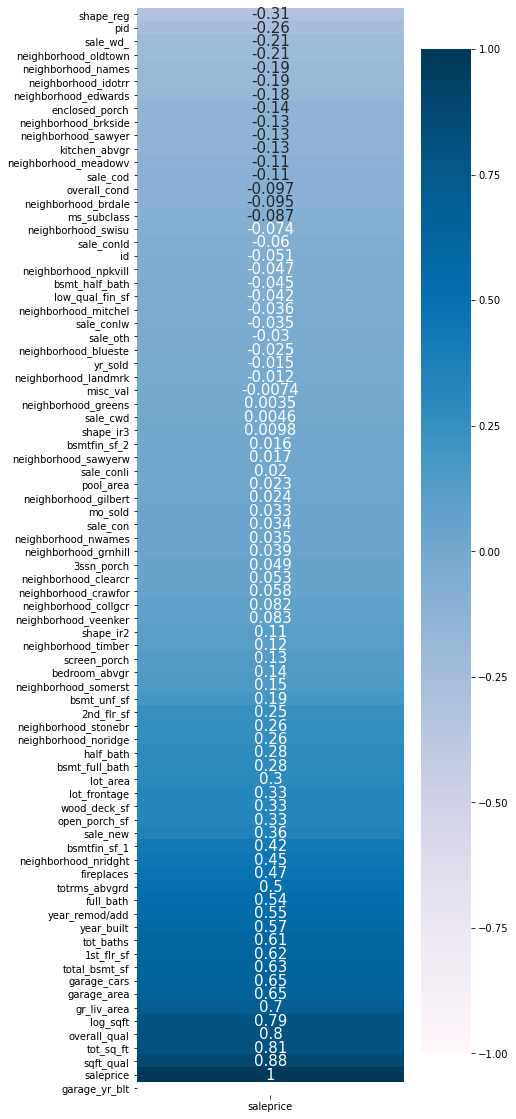

In [145]:
plt.figure(figsize=(6,20))
sns.heatmap(ames_train.corr()[['saleprice']].sort_values('saleprice'),
           annot=True,
            cmap='PuBu',
            annot_kws={'fontsize':15},
            vmin=-1,
            vmax=1
           );

------

# I am still improving this split worksheet workflow. Many of the visualizations in the modeling worksheet should actually be here in the EDA worksheet. 


----

# OUTPUT CLEAN DATA TO NEW CSV TO IMPORT FOR MODELING

In [146]:
ames_train.to_csv('./datasets/train_clean.csv',index=False)

In [148]:
ames_test.to_csv('./datasets/test_clean.csv',index=False)